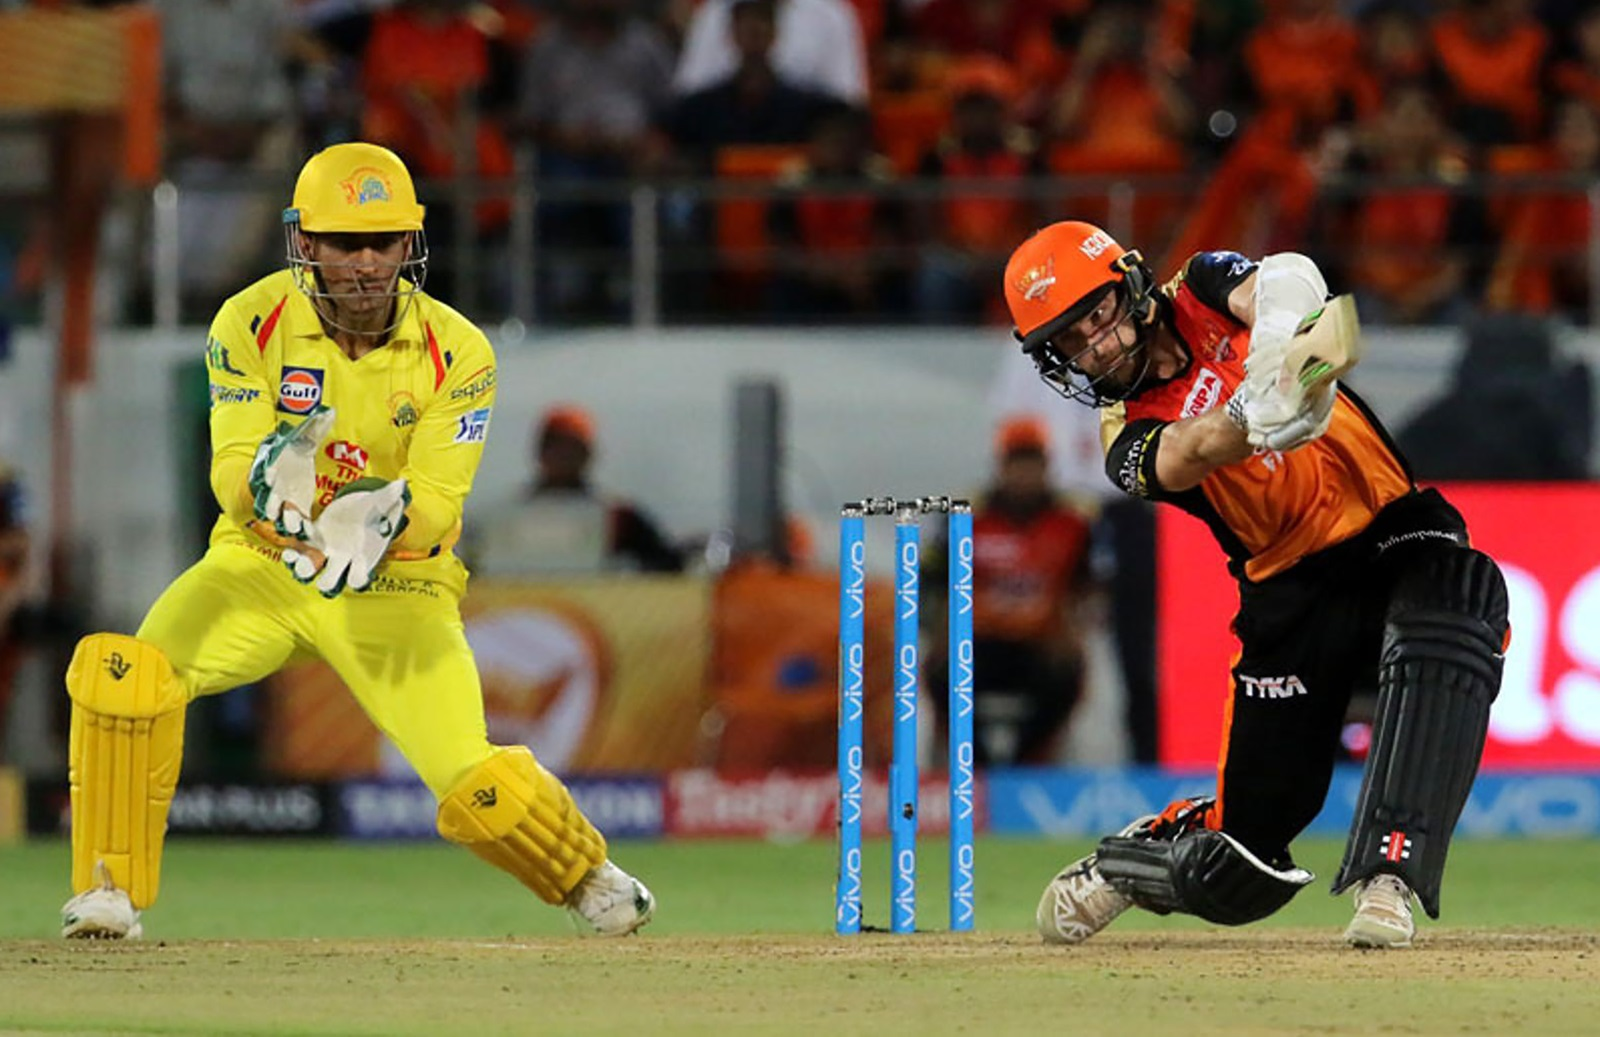

#                                               Professional Cricket Leagues Twitter Dataset

This notebook contains the code used to extract Twitter data from 10 different cricket leagues' Twitter accounts. The purpose of this notebook was to create a complete and clean dataset that would later be used to perform Econometric analysis on for my thesis. Therefore, one should use this notebook solely as a reference when reading my thesis paper: "Analysing the Impact of Social Media Marketing on User Engagement Using Natural Language Processing and Big Data Analytics: The Case of Professional Cricket Leagues".

If you have any feedback, queries or concerns regarding this notebook, please feel free to email me at aryanmsr@gmail.com.

Link to thesis: https://drive.google.com/file/d/12O0pSfLe5M7m73ix6uk5TLUgcQOVHulS/view?usp=sharing

## Importing the Libraries.

In [1]:
import snscrape.modules.twitter as sntwitter
import numpy as np
import pandas as pd
import nltk
from nltk.stem.porter import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Creating the Scraper Function.

The scraper function utilizes the snscrape library to extract all tweets from a given cricket league between January 2018 and May 2021 and returns them as a dataframe with specific attributes such as the number of replies, retweets, etc. We can then call this function using the relevant cricket league's Twitter account as the argument.

In [2]:
def tweetscraper(l):
    tweets_list = []
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f"from:{l} since:2018-01-01 until:2021-05-01").get_items()):
        if i > 10000000: 
            break
        tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.user.followersCount, tweet.retweetedTweet, tweet.quotedTweet, tweet.mentionedUsers, tweet.outlinks])
    return pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Replies', 'Retweets', 'Likes', 'Quotes', 'Followers', 'IsRetweet', 'IsQuoted', 'MentionedUsers', 'Outlinks'])

In [3]:
tweets_df1 = tweetscraper("IPL")
tweets_df2 = tweetscraper("thePSLt20")
tweets_df3 = tweetscraper("BBL")
tweets_df4 = tweetscraper("VitalityBlast")
tweets_df5 = tweetscraper("CPL")
tweets_df6 = tweetscraper("Official_BPLT20")
tweets_df7 = tweetscraper("MSL_T20")
tweets_df8 = tweetscraper("GT20Canada")
tweets_df9 = tweetscraper("LPLT20")
tweets_df10= tweetscraper("T10League")

In [4]:
tweets_df1.head()

Datetime             Tweet Id  \
0 2021-04-30 20:04:59+00:00  1388222871474900992   
1 2021-04-30 20:01:50+00:00  1388222078608760836   
2 2021-04-30 19:14:06+00:00  1388210068710051846   
3 2021-04-30 19:12:28+00:00  1388209656179265541   
4 2021-04-30 19:05:22+00:00  1388207871804907520   

                                                Text Username  Replies  \
0  READ: @thisisbrar put up a fine all-round show...      IPL       16   
1  .@thisisbrar &amp; @bishnoi0056 are all smiles...      IPL        7   
2  Upstox Most Valuable Asset of the Match betwee...      IPL        7   
3  Award for CRED Power Player of the Match betwe...      IPL       14   
4  Unacademy Lets Crack It Sixes of the Match awa...      IPL        9   

   Retweets  Likes  Quotes  Followers IsRetweet IsQuoted  \
0        27    636       1    6749499      None     None   
1        53   1982       1    6749499      None     None   
2        39   1372       0    6749499      None     None   
3        51   1082       1    6749499      None     None   
4        78   1989       1    6749499      None     None   

                                      MentionedUsers  \
0  [https://twitter.com/thisisbrar, https://twitt...   
1  [https://twitter.com/thisisbrar, https://twitt...   
2  [https://twitter.com/PunjabKingsIPL, https://t...   
3  [https://twitter.com/PunjabKingsIPL, https://t...   
4  [https://twitter.com/PunjabKingsIPL, https://t...   

                                            Outlinks  
0  [https://www.iplt20.com/news/237037/vivo-ipl-2...  
1                                                 []  
2                                                 []  
3                                                 []  
4                                                 []

In [5]:
tweets_df2.head()

Datetime             Tweet Id  \
0 2021-04-29 13:09:20+00:00  1387755881295712257   
1 2021-04-28 11:55:32+00:00  1387374921773371397   
2 2021-04-28 09:11:49+00:00  1387333721531949059   
3 2021-04-27 17:21:40+00:00  1387094607389986825   
4 2021-04-27 17:21:39+00:00  1387094605544448005   

                                                Text   Username  Replies  \
0  Dekho dekho kaun aaya... 👀 \n\nUsman Khwaja ma...  thePSLt20       11   
1  Can't wait to see @Russell12A serve up some ba...  thePSLt20        9   
2  Who has been your favourite pick of the #HBLPS...  thePSLt20       54   
3  #HBLPSL6 replacement submissions in the Supple...  thePSLt20        3   
4  #HBLPSL6 replacement submissions in the Silver...  thePSLt20        5   

   Retweets  Likes  Quotes  Followers IsRetweet  \
0        71   1322       2    1872621      None   
1        54   1217       1    1872621      None   
2        57   1069       6    1872621      None   
3        30    363       4    1872621      None   
4        28    328       0    1872621      None   

                                            IsQuoted  \
0  https://twitter.com/IsbUnited/status/138773478...   
1                                               None   
2                                               None   
3                                               None   
4                                               None   

                                      MentionedUsers  \
0  [https://twitter.com/IsbUnited, https://twitte...   
1  [https://twitter.com/Russell12A, https://twitt...   
2  [https://twitter.com/lahoreqalandars, https://...   
3  [https://twitter.com/ObedCMcCoy, https://twitt...   
4  [https://twitter.com/EdwardsFidel, https://twi...   

                                            Outlinks  
0  [https://twitter.com/IsbUnited/status/13877347...  
1                                                 []  
2                                                 []  
3                                                 []  
4                                                 []

As one can see, each row represents a specific tweet instance by the relevant cricket league, whereas each column represents a specific attribute from the snscrape tweet object. The first dataframe (tweets_df1) shows all the tweets posted by the IPL from 2018-01-01 until 2021-05-01. Th second dataframe shows all the tweets posted by the PSL, also from 2018-01-01 until 2021-05-01.

## Creating Master DataFrame.

We will now concatenate all the cricket leagues into one master dataframe. Specifically, we will vertically stack all of the leagues' dataframes together. This way, when we perform feature engineering in the future, we can extract all the features at once instead of doing it league by league.

In [6]:
master_df_complete = pd.concat([tweets_df1, tweets_df2, tweets_df3, tweets_df4, tweets_df5, tweets_df6, tweets_df7, tweets_df8, tweets_df9, tweets_df10], ignore_index=True)

## Feature Engineering.

The Feature Engineering process roughly contains the following steps:

- Brainstorming or testing features;
- Deciding what features to create;
- Creating features;
- Testing the impact of the identified features on the task;
- Improving your features if needed;
- Repeat

The first two steps are described with great detail in the main thesis. The features we create in this section were based on a rigorous analysis of the prior literature (see thesis for more). The following sets of operations refer to the creation of new features and the functions that will help us extract those features from the Twitter dataset. 



In [7]:
IsRetweetlist_df = list(master_df_complete['IsRetweet']) #is the tweet a retweet?
IsQuoted_df = list(master_df_complete['IsQuoted']) #is the tweet a quoted tweet?
IsMentionedUsers_df = list(master_df_complete['MentionedUsers']) #does the tweet contain any mentioned users?


In [8]:
def boolconvert(array): #This function converts the answers to boolean values: 1 for yes and 0 for no. 
    l = []
    for i in array:
        if i is None:
            l.append(0)
        else:
            l.append(1)
    return l

In [9]:
master_df_complete['IsRetweetbool'] = boolconvert(IsRetweetlist_df) 
master_df_complete['IsQuotedbool'] = boolconvert(IsQuoted_df)
master_df_complete['MentionedUserBool'] = boolconvert(IsMentionedUsers_df)

In [10]:
import re
def hashtag_extract(x): #This function extracts the hashtags mentioned in a given tweet and stores them in a list. 
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [11]:
def outlink_extract(x): #This function extracts the outer links in a given tweet and stores them in a list.
    outlinks = []
    # Loop over the words in the tweet
    for i in x:
        ot = re.findall("(?P<url>https?://[^\s]+)", i)
        outlinks.append(ot)
    return outlinks

In [12]:
def user_extract(x): #This function extracts the users mentioned in a given tweet and stores them in a list.
    users = []
    # Loop over the words in the tweet
    for i in x:
        user = re.findall(r"@(\w+)", i)
        users.append(user)

    return users

In [13]:
HT_regular_1 = hashtag_extract(tweets_df1['Text'])
HT_regular_2 = hashtag_extract(tweets_df2['Text'])
HT_regular_3 = hashtag_extract(tweets_df3['Text'])
HT_regular_4 = hashtag_extract(tweets_df4['Text'])
HT_regular_5 = hashtag_extract(tweets_df5['Text'])
HT_regular_6 = hashtag_extract(tweets_df6['Text'])
HT_regular_7 = hashtag_extract(tweets_df7['Text'])
HT_regular_8 = hashtag_extract(tweets_df8['Text'])
HT_regular_9 = hashtag_extract(tweets_df9['Text'])
HT_regular_10 = hashtag_extract(tweets_df10['Text'])


In [14]:
Outlinks_regular_1 = outlink_extract(tweets_df1['Text'])
Outlinks_regular_2 = outlink_extract(tweets_df2['Text'])
Outlinks_regular_3 = outlink_extract(tweets_df3['Text'])
Outlinks_regular_4 = outlink_extract(tweets_df4['Text'])
Outlinks_regular_5 = outlink_extract(tweets_df5['Text'])
Outlinks_regular_6 = outlink_extract(tweets_df6['Text'])
Outlinks_regular_7 = outlink_extract(tweets_df7['Text'])
Outlinks_regular_8 = outlink_extract(tweets_df8['Text'])
Outlinks_regular_9 = outlink_extract(tweets_df9['Text'])
Outlinks_regular_10 = outlink_extract(tweets_df10['Text'])

In [15]:
users_regular_1 = user_extract(tweets_df1['Text'])
users_regular_2 = user_extract(tweets_df2['Text'])
users_regular_3 = user_extract(tweets_df3['Text'])
users_regular_4 = user_extract(tweets_df4['Text'])
users_regular_5 = user_extract(tweets_df5['Text'])
users_regular_6 = user_extract(tweets_df6['Text'])
users_regular_7 = user_extract(tweets_df7['Text'])
users_regular_8 = user_extract(tweets_df8['Text'])
users_regular_9 = user_extract(tweets_df9['Text'])
users_regular_10 = user_extract(tweets_df10['Text'])

In [16]:
def numthings(x): #This function counts the number of things in a list.
    l = []
    for i in x:
        l.append(len(i))
    return l

In [17]:
tweets_df1['NumHashtags'] = numthings(HT_regular_1) #This new column refers to the number of hashtags in each tweet.
tweets_df2['NumHashtags'] = numthings(HT_regular_2)
tweets_df3['NumHashtags'] = numthings(HT_regular_3)
tweets_df4['NumHashtags'] = numthings(HT_regular_4)
tweets_df5['NumHashtags'] = numthings(HT_regular_5)
tweets_df6['NumHashtags'] = numthings(HT_regular_6)
tweets_df7['NumHashtags'] = numthings(HT_regular_7)
tweets_df8['NumHashtags'] = numthings(HT_regular_8)
tweets_df9['NumHashtags'] = numthings(HT_regular_9)
tweets_df10['NumHashtags'] = numthings(HT_regular_10)


In [18]:
tweets_df1['NumOutlinks2'] = numthings(Outlinks_regular_1) #This new column refers to the number of outer links in each tweet.
tweets_df2['NumOutlinks2'] = numthings(Outlinks_regular_2)
tweets_df3['NumOutlinks2'] = numthings(Outlinks_regular_3)
tweets_df4['NumOutlinks2'] = numthings(Outlinks_regular_4)
tweets_df5['NumOutlinks2'] = numthings(Outlinks_regular_5)
tweets_df6['NumOutlinks2'] = numthings(Outlinks_regular_6)
tweets_df7['NumOutlinks2'] = numthings(Outlinks_regular_7)
tweets_df8['NumOutlinks2'] = numthings(Outlinks_regular_8)
tweets_df9['NumOutlinks2'] = numthings(Outlinks_regular_9)
tweets_df10['NumOutlinks2'] = numthings(Outlinks_regular_10)

In [19]:
tweets_df1['Numusers2'] = numthings(users_regular_1) #This new column refers to the number of users mentions in each tweet.
tweets_df2['Numusers2'] = numthings(users_regular_2)
tweets_df3['Numusers2'] = numthings(users_regular_3)
tweets_df4['Numusers2'] = numthings(users_regular_4)
tweets_df5['Numusers2'] = numthings(users_regular_5)
tweets_df6['Numusers2'] = numthings(users_regular_6)
tweets_df7['Numusers2'] = numthings(users_regular_7)
tweets_df8['Numusers2'] = numthings(users_regular_8)
tweets_df9['Numusers2'] = numthings(users_regular_9)
tweets_df10['Numusers2'] = numthings(users_regular_10)

After creating the new columns, we will now insert them into our master dataframe. 

In [20]:
master_df_complete["NumHashtags"] = pd.DataFrame(pd.concat([tweets_df1["NumHashtags"], tweets_df2["NumHashtags"], tweets_df3["NumHashtags"], tweets_df4["NumHashtags"], tweets_df5["NumHashtags"], tweets_df6["NumHashtags"], tweets_df7["NumHashtags"], tweets_df8["NumHashtags"], tweets_df9["NumHashtags"], tweets_df10["NumHashtags"]], ignore_index=True))
master_df_complete["NumOutlinks2"] = pd.DataFrame(pd.concat([tweets_df1["NumOutlinks2"], tweets_df2["NumOutlinks2"], tweets_df3["NumOutlinks2"], tweets_df4["NumOutlinks2"], tweets_df5["NumOutlinks2"], tweets_df6["NumOutlinks2"], tweets_df7["NumOutlinks2"], tweets_df8["NumOutlinks2"], tweets_df9["NumOutlinks2"], tweets_df10["NumOutlinks2"]], ignore_index=True))
master_df_complete["Numusers2"] = pd.DataFrame(pd.concat([tweets_df1["Numusers2"], tweets_df2["Numusers2"], tweets_df3["Numusers2"], tweets_df4["Numusers2"], tweets_df5["Numusers2"], tweets_df6["Numusers2"], tweets_df7["Numusers2"], tweets_df8["Numusers2"], tweets_df9["Numusers2"], tweets_df10["Numusers2"]], ignore_index=True))

### Visualizing the Most Frequent Hashtags Used Across the IPL, PSL, and BBL. 

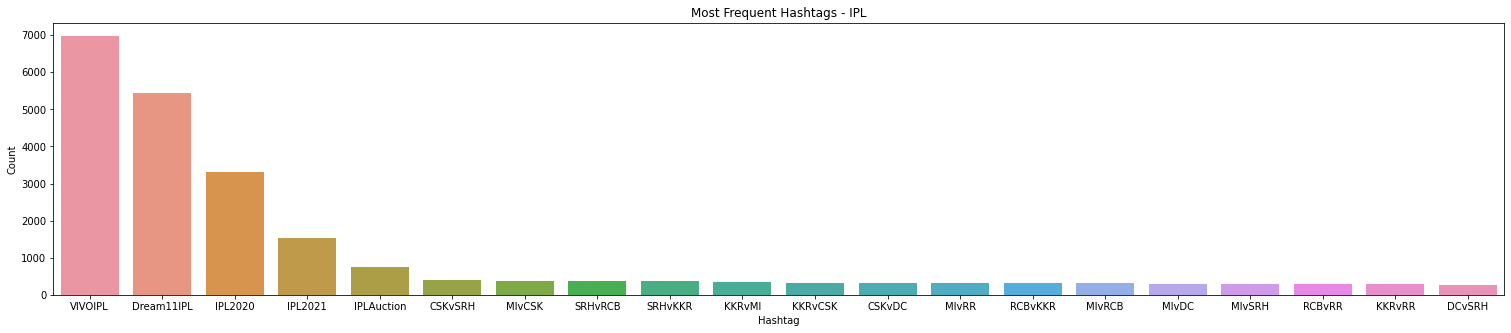

In [21]:
a = nltk.FreqDist(sum(HT_regular_1,[]))
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(26,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("Most Frequent Hashtags - IPL")
plt.show()

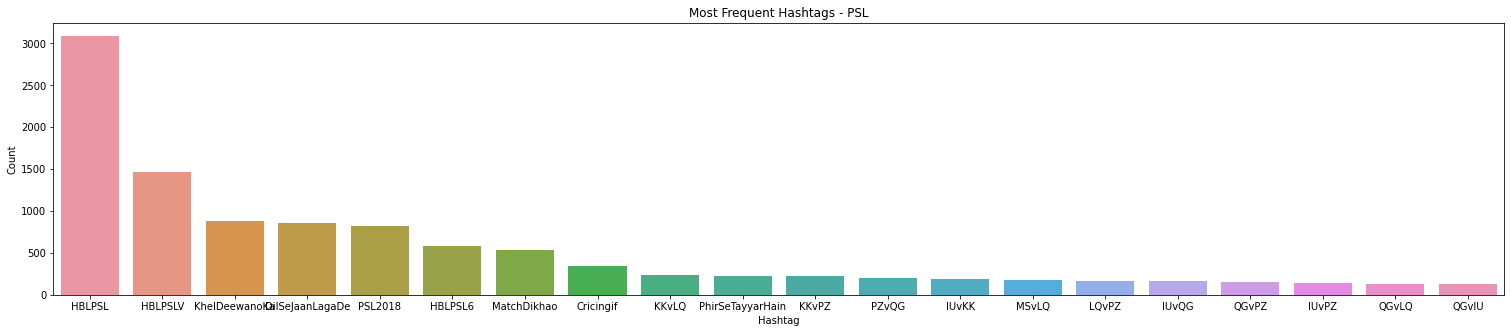

In [22]:
b = nltk.FreqDist(sum(HT_regular_2,[]))
e = pd.DataFrame({'Hashtag': list(b.keys()),
                  'Count': list(b.values())})
# selecting top 10 most frequent hashtags     
e = e.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(26,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("Most Frequent Hashtags - PSL")
plt.show()

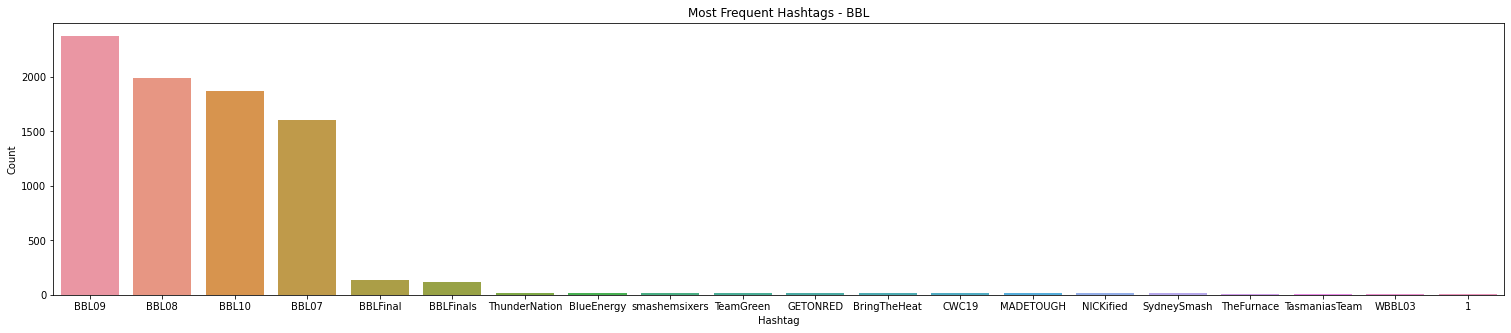

In [23]:
c = nltk.FreqDist(sum(HT_regular_3,[]))
f = pd.DataFrame({'Hashtag': list(c.keys()),
                  'Count': list(c.values())})
# selecting top 10 most frequent hashtags     
f = f.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(26,5))
ax = sns.barplot(data=f, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("Most Frequent Hashtags - BBL")
plt.show()

### Performing Sentiment Analysis.

Sentiment Analysis can be a powerful tool in which a given tweet can be analysed using Natural Language Processing (NLP) and then be classified as either a positive, neutral, or negative sentiment. While there are multiple methods to perform sentiment analysis, such as through statistical and Machine Learning models, we will instead use the rule-based Sentiment Analysis approach, as it requires minimal amount of data pre-processing and can be performed with relatively fewer lines of code while yielding comparatively accurate results. The process of performing a standard rule-based Sentiment Analysis can be briefly outlined as follows:

- We first tokenize the tweet into its component sentences and words. Tokenization refers to the act of separating a text into smaller units called tokens, which can either be words, characters or subwords.
- We then proceed to tag and identify each token with a part-of-speech component (e.g., noun, verb, etc.).
- A sentiment score is assigned between -1 and 1.
- The score is returned.

The most popular library that performs these tasks on Python is TextBlob. TextBlob is a Python library for processing textual data, such as Twitter data, movie reviews, product reviews etc. According to TextBlob’s official documentation, it provides a simple API for performing NLP tasks such as part-of-speech tagging, sentiment analysis, classification, translation and more. TextBlob’s sentiment analyser returns two main properties that are associated with a given text: Subjectivity and Polarity. Subjectivity is a float value between the range of 0 and 1 and it usually refers to personal opinions, emotions, and judgements. On the other hand, Polarity is a measure of sentiment associated with a given text. It is also a float value that lies between -1 and 1 where 1 indicates a very positive sentiment, and -1 indicates a very negative sentiment. For the purpose of our analysis, we will refer to tweets with Polarity values above 0 as positive tweets, tweets with values below 0 as negative tweets, and tweets with values equal to 0 as neutral tweets. This implies that the higher the Polarity, the most positive a tweet. In this accord, we will focus only on the Polarity value as it is indeed the measure for the level of sentiment associated with a cricket league’s tweet.

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [25]:
master_df_complete['Subjectivity'] = master_df_complete['Text'].apply(getTextSubjectivity)
master_df_complete['Polarity'] = master_df_complete['Text'].apply(getTextPolarity)

In [26]:
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [27]:
master_df_complete['Score'] = master_df_complete['Polarity'].apply(getTextAnalysis)
positive_df1 = master_df_complete[master_df_complete['Score'] == 'Positive']
print(str(positive_df1.shape[0]/(master_df_complete.shape[0])*100) + " % of positive tweets overall across all league accounts")

40.92586320611776 % of positive tweets overall across all league accounts


In [28]:
neutral_df1 = master_df_complete[master_df_complete['Score'] == 'Neutral']
print(str(neutral_df1.shape[0]/(master_df_complete.shape[0])*100) + " % of neutral tweets overall across all league accounts")

50.277188541685234 % of neutral tweets overall across all league accounts


In [29]:
negative_df1 = master_df_complete[master_df_complete['Score'] == 'Negative']
print(str(negative_df1.shape[0]/(master_df_complete.shape[0])*100) + " % of negative tweets by IPL account")

8.796948252197009 % of negative tweets by IPL account


Another library that can be used to perform basic Sentiment Analysis is VADER, which is short for Valence Aware Dictionary for Sentiment Reasoning. VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. While our primary library for Sentiment Analysis will still be Textblob, there is no harm in checking out the results obtained from VADER too.

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [31]:
master_df_complete['vader_scores'] = master_df_complete['Text'].apply(lambda Text: sid.polarity_scores(Text)).head()
master_df_complete['compound'] = master_df_complete['Text'].apply(lambda x:sid.polarity_scores(x)['compound'])
master_df_complete['sentiment_type']=''
master_df_complete.loc[master_df_complete.compound>0,'sentiment_type']='POSITIVE'
master_df_complete.loc[master_df_complete.compound==0,'sentiment_type']='NEUTRAL'
master_df_complete.loc[master_df_complete.compound<0,'sentiment_type']='NEGATIVE'

### Creating the Interaction Feature.

Now that we have all the relevant prelimanary features, we will now create the "Interaction" feature, which captures the level of interactivity of a particular tweet by a cricket league. "Interaction" is the sum of the number of followers of a given cricket league's Twitter account and the number of hashtags, users mentioned, and outer links in the given tweet.

In [32]:
interaction_column_1  = tweets_df1.shape[0] + tweets_df1['NumHashtags'] + tweets_df1['Numusers2'] + tweets_df1['NumOutlinks2']
interaction_column_2  = tweets_df2.shape[0] + tweets_df2['NumHashtags'] + tweets_df2['Numusers2'] + tweets_df2['NumOutlinks2']
interaction_column_3  = tweets_df3.shape[0] + tweets_df3['NumHashtags'] + tweets_df3['Numusers2'] + tweets_df3['NumOutlinks2']
interaction_column_4  = tweets_df4.shape[0] + tweets_df4['NumHashtags'] + tweets_df4['Numusers2'] + tweets_df4['NumOutlinks2']
interaction_column_5  = tweets_df5.shape[0] + tweets_df5['NumHashtags'] + tweets_df5['Numusers2'] + tweets_df5['NumOutlinks2']
interaction_column_6  = tweets_df6.shape[0] + tweets_df6['NumHashtags'] + tweets_df6['Numusers2'] + tweets_df6['NumOutlinks2']
interaction_column_7  = tweets_df7.shape[0] + tweets_df7['NumHashtags'] + tweets_df7['Numusers2'] + tweets_df7['NumOutlinks2']
interaction_column_8  = tweets_df8.shape[0] + tweets_df8['NumHashtags'] + tweets_df8['Numusers2'] + tweets_df8['NumOutlinks2']
interaction_column_9  = tweets_df9.shape[0] + tweets_df9['NumHashtags'] + tweets_df9['Numusers2'] + tweets_df9['NumOutlinks2']
interaction_column_10  = tweets_df10.shape[0] + tweets_df10['NumHashtags'] + tweets_df10['Numusers2'] + tweets_df10['NumOutlinks2']

In [33]:
tweets_df1["Interaction"] = interaction_column_1
tweets_df2["Interaction"] = interaction_column_2
tweets_df3["Interaction"] = interaction_column_3
tweets_df4["Interaction"] = interaction_column_4
tweets_df5["Interaction"] = interaction_column_5
tweets_df6["Interaction"] = interaction_column_6
tweets_df7["Interaction"] = interaction_column_7
tweets_df8["Interaction"] = interaction_column_8
tweets_df9["Interaction"] = interaction_column_9
tweets_df10["Interaction"] = interaction_column_10

In [34]:
#Adding the Interaction column in the master dataframe.
master_df_complete["Interaction"] = pd.DataFrame(pd.concat([tweets_df1["Interaction"], tweets_df2["Interaction"], tweets_df3["Interaction"], tweets_df4["Interaction"], tweets_df5["Interaction"], tweets_df6["Interaction"], tweets_df7["Interaction"], tweets_df8["Interaction"], tweets_df9["Interaction"], tweets_df10["Interaction"]], ignore_index=True))

### Creating the Customization Feature.

Now that we have our "Interaction" feature, we will now create the "Customization" feature (known as "Personalization" in the main thesis). Twitter allows leagues to offer personalized services by replying to individual fans or even by directly messaging them. However, direct messaging is private data, thus inaccessible in our case. Nevertheless, replies are publicly shared, and so are quoted tweets (a league quoting a fan’s tweet). In this accord, "Customization" will be measured as an indicator (binary) variable indicating 1 if the tweet by the league is a retweet or a quoted tweet and 0 otherwise (i.e., 1 if the tweet is customized and 0 if not).

In [35]:
custom = [] 
for index, row in master_df_complete.iterrows():
    if row['IsRetweetbool'] == 1 or row['IsQuotedbool'] == 1:
        custom.append(1)
    else:
        custom.append(0)       

In [36]:
custom_series = pd.Series(custom)
master_df_complete["Customization"] = custom_series

In [37]:
customer_engagement_1 = master_df_complete['Retweets'] + master_df_complete['Quotes'] + master_df_complete['Likes'] + master_df_complete['Replies'] 
master_df_complete["Customer_Engagement"] = customer_engagement_1

We finally have all of the features needed to complete the dataset! The following code block verifies all the data types of each feature.

In [38]:
master_df_complete.dtypes

Datetime               datetime64[ns, UTC]
Tweet Id                             int64
Text                                object
Username                            object
Replies                              int64
Retweets                             int64
Likes                                int64
Quotes                               int64
Followers                            int64
IsRetweet                           object
IsQuoted                            object
MentionedUsers                      object
Outlinks                            object
IsRetweetbool                        int64
IsQuotedbool                         int64
MentionedUserBool                    int64
NumHashtags                          int64
NumOutlinks2                         int64
Numusers2                            int64
Subjectivity                       float64
Polarity                           float64
Score                               object
vader_scores                        object
compound   

In [39]:
master_df_complete['Datetime'] = master_df_complete['Datetime'].dt.tz_localize(None) #Modifying the Datetime column so it is compatible with Excel.

## Final Dataset.

In [40]:
master_df_complete

Datetime             Tweet Id  \
0     2021-04-30 20:04:59  1388222871474900992   
1     2021-04-30 20:01:50  1388222078608760836   
2     2021-04-30 19:14:06  1388210068710051846   
3     2021-04-30 19:12:28  1388209656179265541   
4     2021-04-30 19:05:22  1388207871804907520   
...                   ...                  ...   
56094 2018-01-30 06:15:27   958222105882972161   
56095 2018-01-22 07:41:01   955344536296767488   
56096 2018-01-19 07:34:36   954255758379565058   
56097 2018-01-05 06:33:45   949167016014856193   
56098 2018-01-01 05:52:00   947706953912012802   

                                                    Text   Username  Replies  \
0      READ: @thisisbrar put up a fine all-round show...        IPL       16   
1      .@thisisbrar &amp; @bishnoi0056 are all smiles...        IPL        7   
2      Upstox Most Valuable Asset of the Match betwee...        IPL        7   
3      Award for CRED Power Player of the Match betwe...        IPL       14   
4      Unacademy Lets Crack It Sixes of the Match awa...        IPL        9   
...                                                  ...        ...      ...   
56094  Who else remembers the hat-trick by @SAfridiOf...  T10League        4   
56095  Can you guess who this bowler is? 😃\n#BusAbDus...  T10League       36   
56096  The Heera T10 League was filled with some blis...  T10League        1   
56097  We saw a lot of big ones in the tournament. He...  T10League        1   
56098  Wish you a #HappyNewYear, from everyone at T10...  T10League        0   

       Retweets  Likes  Quotes  Followers IsRetweet  ... Numusers2  \
0            27    636       1    6749499      None  ...         3   
1            53   1982       1    6749499      None  ...         3   
2            39   1372       0    6749499      None  ...         3   
3            51   1082       1    6749499      None  ...         3   
4            78   1989       1    6749499      None  ...         3   
...         ...    ...     ...        ...       ...  ...       ...   
56094        21    247       0      66231      None  ...         2   
56095         2    136       2      66231      None  ...         0   
56096         2     71       0      66231      None  ...         0   
56097         5    168       0      66231      None  ...         0   
56098         4    134       1      66231      None  ...         0   

      Subjectivity  Polarity     Score  \
0         0.360000  0.263333  Positive   
1         0.400000  0.800000  Positive   
2         0.500000  0.500000  Positive   
3         0.000000  0.000000   Neutral   
4         0.000000  0.000000   Neutral   
...            ...       ...       ...   
56094     0.333333  0.250000  Positive   
56095     0.000000  0.000000   Neutral   
56096     0.900000  0.400000  Positive   
56097     0.100000  0.000000   Neutral   
56098     0.000000  0.000000   Neutral   

                                            vader_scores  compound  \
0      {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...    0.6808   
1      {'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'comp...    0.7845   
2      {'neg': 0.0, 'neu': 0.722, 'pos': 0.278, 'comp...    0.7328   
3      {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'comp...    0.7906   
4      {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...    0.5423   
...                                                  ...       ...   
56094                                                NaN    0.0000   
56095                                                NaN    0.0000   
56096                                                NaN   -0.1280   
56097                                                NaN    0.0000   
56098                                                NaN    0.4019   

       sentiment_type  Interaction  Customization  Customer_Engagement  
0            POSITIVE        18624              0                  680  
1            POSITIVE        18625              0                 2043  
2            POSITIVE        18624              0

## Converting the Final Dataset From a Pandas DataFrame to an Excel File.

In [41]:
master_df_complete.to_excel('master_df_complete.xlsx', index=False)